# Team 88: Project Dataset Details
## Airport Traffic Data

In [1]:
#modules
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

### [Airport and Airline Data](https://www.transtats.bts.gov/tables.asp?db_id=125&DB_Name=Airline%20Origin%20and%20Destination%20Survey%20(DB1B))
The Bureau of Transportation Statistics provides data on a 10% sample of flights and airline tickets going back to 1993 and recorded quarterly. The data can be filtered by destination airport and date. Bay Area destination airports of interest to us are San Francisco International Airport and Oakland International Airport. 

### Data Acquisition
With this data, the extraction process is a bit more manually involved as we need to download the files for each year and each quarter separately before combining them and making sure all the variables track before starting the analysis and exploration. There are two tables we need to explore in order to get all our variables of interest. These are `DB1BMarket` and `DB1BTicket`, and can be found [here](https://www.transtats.bts.gov/tables.asp?db_id=125&DB_Name=Airline%20Origin%20and%20Destination%20Survey%20%28DB1B%29). Part of our decision making will also include deciding how many years to explore - especially as we hope to be looking at the effects of wildfires on mobility and travel in the last decade. As this is only 10% of the actual traffic, we are hoping the sample is representative enough of trends.

Some relevant variables for us include for each of the tables includes:

***DB1BMarket***
- ItinID (int): a unique itinerary identifier which will help us connect the two tables together
- Orig and Dest (string): three letter airport codes for the origin/destination airport
- OriginAirportID(int) and DestAirportID (int): a unique identifier for the origin/destination airport
- Year and Quarter (string and int)
- Passengers (int): number of passengers

***DB1BTicket***
- ItinID (int): a unique itinerary identifier which will help us connect the two tables together
- RoundTrip (int): a round trip indicator (1=Yes, 0=No)
- ItinFare and FarePerMile (float): fares for the entire itinerary and per mile flown, respectively

### Dataset Structure and Features
To see more of the dataset, we are using a sample of the downloads for `2019 - Q3` for both `DB1BMarket` and `DB1BTicket` to see what variables look like and how we would think of using them for the purposes of this project.

In [3]:
df_market = pd.read_csv('data/airports/920348143_T_DB1B_MARKET.csv')
df_ticket = pd.read_csv('data/airports/920348143_T_DB1B_TICKET.csv')

In [3]:
#size of the data
for table, name in zip([df_market.shape, df_ticket.shape], ['market', 'ticket']):
    print('The airport', name, 'data has {} rows and {} columns'.format(table[0], table[1]))

The airport market data has 7141323 rows and 7 columns
The airport ticket data has 4390179 rows and 7 columns


In [4]:
#market view
df_market.head(2)

,ITIN_ID,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,PASSENGERS,Unnamed: 6
0,2019310,10135,ABE,10397,ATL,1.0,NaN
1,2019311,10135,ABE,10397,ATL,1.0,NaN


In [5]:
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141323 entries, 0 to 7141322
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ITIN_ID            int64  
 1   ORIGIN_AIRPORT_ID  int64  
 2   ORIGIN             object 
 3   DEST_AIRPORT_ID    int64  
 4   DEST               object 
 5   PASSENGERS         float64
 6   Unnamed: 6         float64
dtypes: float64(2), int64(3), object(2)
memory usage: 381.4+ MB


In [6]:
#ticket view
df_ticket.head(2)

,ITIN_ID,YEAR,QUARTER,ROUNDTRIP,ITIN_YIELD,ITIN_FARE,Unnamed: 6
0,2019310,2019,3,0.0,0.0000,0.0,NaN
1,2019311,2019,3,0.0,0.0072,5.0,NaN


In [7]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4390179 entries, 0 to 4390178
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ITIN_ID     int64  
 1   YEAR        int64  
 2   QUARTER     int64  
 3   ROUNDTRIP   float64
 4   ITIN_YIELD  float64
 5   ITIN_FARE   float64
 6   Unnamed: 6  float64
dtypes: float64(4), int64(3)
memory usage: 234.5 MB


For each table, we have picked up an empty column that has no meaning so we can drop it for both to save computational time while processing the dataframes.

In [4]:
df_market = df_market.drop(['Unnamed: 6'], axis=1)
df_ticket = df_ticket.drop(['Unnamed: 6'], axis=1)

In [9]:
#checking if itinerary ID is unique
df_market['ITIN_ID'].value_counts()

201935934420    10
201931763496    10
201933115014     8
201938036        8
201933154796     8
                ..
20193852642      1
201932991688     1
201932995786     1
20193762526      1
201934813207     1
Name: ITIN_ID, Length: 4390179, dtype: int64

From the above market table data, we see that the count of unique values is the same as the total rows in the ticket table data. This confirms that the `INIT_ID` field is one we can use to merge the two tables. We can now do that and explore airport markets and traffic in the Bay Area airports

In [5]:
df_travel = pd.merge(df_market, df_ticket, on='ITIN_ID')
df_travel.head(2)

,ITIN_ID,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,PASSENGERS,YEAR,QUARTER,ROUNDTRIP,ITIN_YIELD,ITIN_FARE
0,2019310,10135,ABE,10397,ATL,1.0,2019,3,0.0,0.0000,0.0
1,2019311,10135,ABE,10397,ATL,1.0,2019,3,0.0,0.0072,5.0


### Bay Area Airports
According to [this article](https://traveltips.usatoday.com/airports-bay-area-california-104230.html) and two other quick searches, there are four main passenger airports in the California Bay Area. These are:
- San Francisco International Airport (SFO) — Class B airspace
- Norman Y. Mineta San José International Airport (SJC) — Class C airspace
- Oakland International Airport (OAK) — Class C airspace
- Charles M. Schulz–Sonoma County Airport (STS) — Class D airspace

These will be the ones we focus on for analyses for the combined dataset.


In [2]:
bay_area_destinations = ['SFO', 'SJC', 'OAK', 'STS']

In [6]:
df_bayarea = df_travel[df_travel['DEST'].isin(bay_area_destinations)]

#dataframe metrics for quarter
print('In Q3 2019, 10% of airport traffic data shows {} inbound bay area flight itineraries'.format(df_bayarea.shape[0]))
df_bayarea.describe()

In Q3 2019, 10% of airport traffic data shows 281793 inbound bay area flight itineraries


,ITIN_ID,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,PASSENGERS,YEAR,QUARTER,ROUNDTRIP,ITIN_YIELD,ITIN_FARE
count,2.817930e+05,281793.000000,281793.000000,281793.000000,281793.0,281793.0,281793.000000,281793.000000,281793.000000
mean,1.892004e+11,12717.755672,14641.191172,2.596999,2019.0,3.0,0.719954,0.208882,467.047120
std,4.655266e+10,1518.700830,360.349496,8.754858,0.0,0.0,0.449022,0.221937,400.044297
min,2.019333e+07,10135.000000,13796.000000,1.000000,2019.0,3.0,0.000000,0.000000,0.000000
25%,2.019317e+11,11292.000000,14771.000000,1.000000,2019.0,3.0,0.000000,0.098300,239.000000
50%,2.019339e+11,12889.000000,14771.000000,1.000000,2019.0,3.0,1.000000,0.150800,394.000000
75%,2.019348e+11,14057.000000,14831.000000,2.000000,2019.0,3.0,1.000000,0.261200,585.000000
max,2.019359e+11,16218.000000,15023.000000,621.000000,2019.0,3.0,1.000000,31.112800,15360.000000


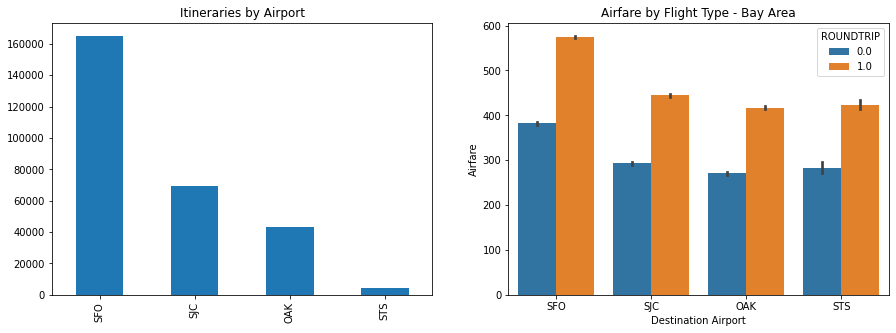

In [13]:
#flights inbound by airport
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
df_bayarea['DEST'].value_counts().plot.bar(ax=ax1, title='Itineraries by Airport')
sns.barplot(x='DEST', y='ITIN_FARE', hue='ROUNDTRIP',data=df_bayarea, ax=ax2)
ax2.set(xlabel='Destination Airport', ylabel='Airfare', title='Airfare by Flight Type - Bay Area')
plt.show()

We see that San Francisco International Airport has the most traffic which makes sense as it is a major hub. There is also the expected majority of return flights compared to one-way travel to the bay area. This tells us a lot of the people are visiting this area. It would be nice to know how long they stay, but for the purposes of this exploration and even phase 1 of our project, we will not delve that deep on that aspect. There is an outlier for over $15,000 in airfare for an itinerary that seems to cover the corresponding passenger count outlier of over 600 people.

### Other Features:
More variables that might be interesting to explore more during EDA include passengers - to see if the volume matches up with the airports to scale. Additionally, we can compare the airfares across quarters once all the data is concatenated to include all years of interest. Another thing we can look into once we decide the duration scope is how the price changes throughout the year affect travel. For instance, we would expect the Indigenous people's weekend travel to be a busy time for all airports along with Christmas season. Those impacts would be useful to consider so that it is noted and not compounded when looking at wildfire season and patterns of travel during those times.

### Supplemental Information
We can use other data from a quick search to see if there are other airports and cities we should be looking at in the Bay Area. Additionally, we can get a list of all cities associated here and find the corresponding county and use that to connect with other datasets e.g. air quality data and fire incident data. This would help us attach other datasets to this one. For linking data we anticipate two variables:
- Time (quarter and year)
- Location (city, county, and state)
- *Potentially* counties for airports


### Next Steps:
Because a lot of the tasks are ahead here, the main thing this time was to connect the data from all periods of interest that we decided on. We have decided to study the period of 2015-2020 and use any additional data to add context as a control for similar time periods. The reasons for this bound are:
- We only have AirBnB data, which we plan to connect here, from 2015 onward
- The California Wildfire data only goes as far back as 2013, further enforcing the lack of much information before the 2010s
- Environmental factors have changed a lot in the last decade with a lot of major wildfires happeninig then. Comparing it to a prior time period may be helpful to see what has changed historically, but not helpful for the purposes of representing travel advisories.

### Compiling and Appending Data
Above, we mention that some periods outside of the last five years may be nice for exploratory data analysis as we built out our dashboard. For this case, we get data for the whole decade, starting with Q4 2010 so that we have a round number of years as we are currently in Q4 2020. The following steps from above will also be applied to the aggregated dataset that combines all periods:
- Removing unknown columns because they are empty delimited columns at the end of each table
- Merging the ticket and market tables on itinerary ID
- Only using variables from both sources including location, time, passenger, and round trip variables
- Dropping any data that is not inbound to the bay area because we are not examining that vantage point, and it helps us reduce the data we have to store

The data is aggregated below:

In [8]:
#file names
market_data, ticket_data = [], []
for q in range(1,5):
    for y in range(2010, 2021):
        if (q != 4 and y == 2010) or (q == 4 and y == 2020):
            continue
        else: 
            market_data.append('127606545_T_DB1B_MARKET_Q{}_{}.csv'.format(q, y))
            ticket_data.append('127606545_T_DB1B_TICKET_Q{}_{}.csv'.format(q, y))

In [9]:
#method for combining dataframes
def aggregate_datasets(market_table_name, ticket_table_name):
    market_table = pd.read_csv('data/airports/'+market_table_name).drop(['Unnamed: 6'], axis=1)
    market_table = market_table[market_table['DEST'].isin(bay_area_destinations)]
    ticket_table = pd.read_csv('data/airports/'+ticket_table_name).drop(['Unnamed: 6'], axis=1)
    return pd.merge(market_table, ticket_table, on='ITIN_ID')

In [12]:
#load and combine all datasets
all_travel = pd.DataFrame()
for market_name, ticket_name in zip(market_data, ticket_data):
    all_travel = pd.concat([all_travel, aggregate_datasets(market_name, ticket_name)])

In [13]:
print(all_travel.shape)
all_travel.head(2)

(4288742, 11)


,ITIN_ID,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,PASSENGERS,YEAR,QUARTER,ORIGIN_COUNTRY,ROUNDTRIP,ITIN_FARE
0,20111156458,11278,DCA,14771,SFO,1.0,2011,1,US,0.0,2112.0
1,20111156497,11618,EWR,14831,SJC,1.0,2011,1,US,0.0,394.0


In [15]:
#saving into single file for storage
all_travel.to_csv('data/all_travel.csv')

After filtering the dataset to only include bay area inbound flights and aggregating all periods, we can graph a time series to see how the traffic changes over time, and what the most common origin locations are for visitors and nomads.

### Time Changes - High Level View:
For this high level check of how the last decade has gone. We will have a quarterly plot to check for seasonal changes of the time series. For the annual graph, we will only plot (for now) 2011-2019 for two reasons:
- We are not in an EDA deep dive yet
- We are still in Q4 2020 and COVID happens which means we can't really compare it to all other years without that added context
- Q4 2010 was only included to round out our quarters to 40 and our main focus starts in 2015-2020, so we are (for now), not losing much by not seeing this quarter and it will appear negligible because there is only one out of four quarters for 2010

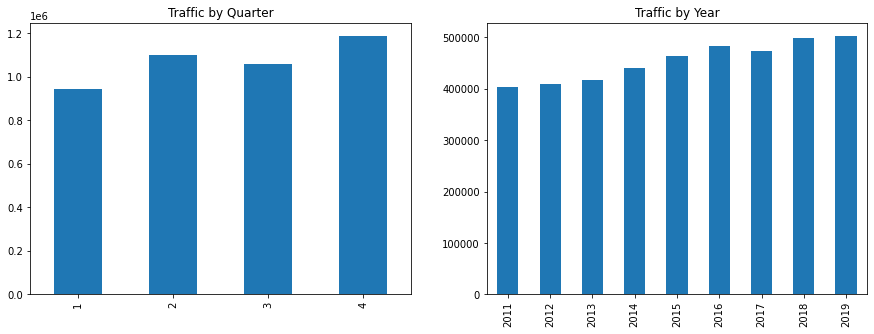

In [75]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
all_travel['QUARTER'].value_counts().sort_index().plot.bar(title='Traffic by Quarter', ax=ax1)
all_travel[all_travel['YEAR'].isin(range(2011,2020))]['YEAR'].value_counts().sort_index(ascending=True).plot.bar(title='Traffic by Year', ax=ax2)
plt.show()

Flight plans seem to have increased over the years, and Q4 which has a lot of traditional U.S. holidays is the highest travel quarter. In the exploratory data analysis, something to explore will be how this changes by year and if the trend is cyclical.

Now for the inbound flights and where they come from!

In [44]:
inbound_ct = pd.DataFrame(all_travel['ORIGIN'].value_counts())
print('shape', inbound_ct.shape)
inbound_ct.head(2)

shape (441, 1)


,ORIGIN
LAX,352768
SAN,213618


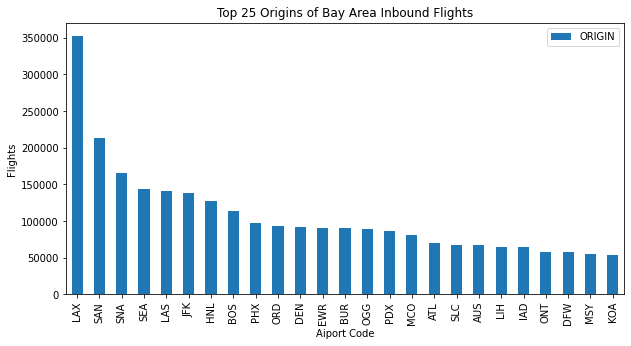

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
inbound_ct[:25].plot.bar(ax=ax)
ax.set(title='Top 25 Origins of Bay Area Inbound Flights', xlabel='Aiport Code', ylabel='Flights')
plt.show()

By far, most people fly in from LAX (Los Angeles International Airport) followed by a few west coast airports and some major hubs including New York (JFK) and Boston (BOS). Given that airport codes are not common knowledge, a supplemental file with the city names for each airport code is included and used to update the plot above for top 25 origin airports for other uses going forward.

The [Market Coordinate](https://www.transtats.bts.gov/Tables.asp?DB_ID=595&DB_Name=Aviation%20Support%20Tables) table download (`341379231_T_MASTER_CORD.csv`) that is also provided by the Bureau of Transportation Statistics as with all our data, includes information about airport codes, IDs, and location, along with any historical identifying information about the airports that appear on the itineraries downloaded.

In [24]:
airport_data = pd.read_csv('data/341379231_T_MASTER_CORD.csv')
airport_data.shape

(18102, 14)

In [25]:
airport_data.head(2)

,AIRPORT_ID,AIRPORT,DISPLAY_AIRPORT_NAME,DISPLAY_AIRPORT_CITY_NAME_FULL,AIRPORT_COUNTRY_NAME,AIRPORT_STATE_NAME,AIRPORT_STATE_FIPS,DISPLAY_CITY_MARKET_NAME_FULL,LAT_DEGREES,LATITUDE,LON_DEGREES,LONGITUDE,AIRPORT_IS_LATEST,Unnamed: 13
0,10001,01A,Afognak Lake Airport,"Afognak Lake, AK",United States,Alaska,2.0,"Afognak Lake, AK",58.0,58.109444,152.0,-152.906667,1,NaN
1,10003,03A,Bear Creek Mining Strip,"Granite Mountain, AK",United States,Alaska,2.0,"Granite Mountain, AK",65.0,65.548056,161.0,-161.071667,1,NaN


There is also an unused column here that we can drop. Additionally now that we have the location information about the airport, we can use it for analysis and have a better representation for the top departure locations

In [45]:
inbound_ct = inbound_ct.reset_index().rename(columns={'index':'AIRPORT', 'ORIGIN':'COUNT'})
inbound_ct = pd.merge(inbound_ct, airport_data[['AIRPORT', 'DISPLAY_AIRPORT_CITY_NAME_FULL']])
#prettify = change name 
inbound_ct = inbound_ct.rename(columns={'DISPLAY_AIRPORT_CITY_NAME_FULL': 'CITY'}).drop_duplicates()

#see table
print('shape', inbound_ct.shape)
inbound_ct.head(2)

shape (453, 3)


,AIRPORT,COUNT,CITY
0,LAX,352768,"Los Angeles, CA"
8,SAN,213618,"San Diego, CA"


The number of rows increased from 441 to 453 which means there are 12 duplicates for airport code. Upon researching, airport codes change with time and can be re-used. To verify that this subset didn't encounter this, we review the airports with duplicates. These are acquired by getting the top 12 value counts returned. After getting this list, we then find out if the city names have changed (or been renamed) over time.

In [60]:
dupes_12 = inbound_ct['AIRPORT'].value_counts()[:12].index
dupes_12

Index(['PSE', 'SJU', 'BQN', 'SPN', 'GUM', 'XWA', 'VQS', 'MAZ', 'STX', 'CPX',
       'STT', 'PPG'],
      dtype='object')

In [62]:
#check the airport cities for dupes
inbound_ct[inbound_ct['AIRPORT'].isin(list(dupes_12))]

,AIRPORT,COUNT,CITY
206,SJU,15693,"San Juan, Puerto Rico"
207,SJU,15693,"San Juan, PR"
341,STT,4311,"Charlotte Amalie, Virgin Islands"
343,STT,4311,"Charlotte Amalie, VI"
726,GUM,785,"Guam, Guam"
727,GUM,785,"Guam, TT"
778,STX,633,"Christiansted, Virgin Islands"
779,STX,633,"Christiansted, VI"
831,PPG,444,"Pago Pago, American Samoa"
832,PPG,444,"Pago Pago, TT"


Pheeeeeew: upon further review, we don't have a lot of duplicates. It is a data entry issue where some of these entries have the state and territories spelt out, while others don't. Since most of the entries have abbreviations for states and U.S. territories, we drop the entries in the `Market Coordinates` file for airport_data that have duplicates.

**That one duplicate:**  
For this data, we do see that the airport code `XWA` has been reused for airports in both Granite Point, Alaska and Williston, North Dakota. The steps to verify whether we need to be concerned about this include:
- Checking if this repurposing was within the last 10 years (2010-2020)
- If so, make sure we deliniate where the old one stops and the new one begins
- If no, make sure we merge with the active airport code location from the `Market Coordinates` table

Here we go!
***Stay tuned. Didn't have time to finish this process, but it is outlined above***